<div class='alert alert-warning'>

# JupyterLite warning

If you are running the current notebook in JupyterLite, you may encounter some unexpected behavior.

The main difference is that imports take longer than usual, for example the first `import sklearn` can take up to 10-20s.

If you notice problems, feel free to open an [issue](https://github.com/probabl-ai/youtube-appendix/issues/new/choose) about it.
</div>

In [ ]:
%pip install pyodide-http
import pyodide_http
import numpy as np
from sklearn.datasets import fetch_openml

pyodide_http.patch_all()
X, y = fetch_openml(data_id=1597, return_X_y=True)

# Subsample the dataset to speed up this demo notebook
n_samples = len(X)
rng = np.random.default_rng(seed=42)
indices = rng.choice(n_samples, size=70_000, replace=False)
X_subsampled = X.iloc[indices]
y_subsampled = y.iloc[indices]
X_subsampled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
262976,-0.014297,0.377671,0.924349,0.890072,-0.038477,0.959004,-0.237223,0.243871,0.628550,-0.019355,...,0.148126,0.294428,1.044627,-0.200794,-0.063318,-0.530401,0.257706,0.142847,0.197888,30.22
218705,-0.485246,1.109351,-0.378925,-0.775102,0.638751,-0.083568,0.228484,0.681959,-0.206145,-1.020827,...,-0.067960,-0.494335,-1.576658,0.213436,-0.093743,-0.634795,-0.108416,0.136550,0.060735,9.01
29603,-1.074894,-0.064725,0.633678,0.803640,2.494472,-0.963024,0.224265,-0.212291,-0.787895,-0.559183,...,0.601886,-0.000601,-0.062341,-0.136383,-0.817343,0.068382,0.527651,-0.101647,-0.066587,0.76
269003,2.064273,0.108319,-1.791482,0.515355,0.103931,-1.473835,0.180554,-0.309785,0.807607,-0.432104,...,-0.286573,0.170955,0.601961,-0.023391,-0.211366,0.226366,-0.089873,-0.011701,-0.035323,4.70
60422,1.012919,-0.380574,0.530600,0.937042,-0.856050,-0.633996,-0.053050,-0.054279,0.703826,-0.223633,...,0.024436,-0.247531,-0.851166,-0.004083,0.381355,0.256696,0.173207,-0.043795,0.033371,114.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123324,1.192269,0.173583,0.140059,0.460298,-0.056107,-0.113761,-0.168557,0.159654,-0.057134,-0.128196,...,-0.154400,-0.241256,-0.745504,0.117626,-0.375723,0.123139,0.130357,-0.017406,0.011789,1.98
124994,-0.511876,1.349541,0.676430,1.275070,-0.224519,-0.546143,0.335245,0.445659,-0.796458,0.074880,...,-0.019944,0.177359,0.657485,-0.055742,0.545148,-0.464479,-0.288503,0.336700,0.188816,1.00
186425,1.719904,-0.621846,-2.459654,0.097367,0.785759,-0.300907,0.701264,-0.230983,0.136772,0.112952,...,0.177690,0.142863,-0.020132,-0.167612,-0.112047,0.260581,-0.295311,-0.094901,-0.042655,206.38
220427,-0.780974,0.550016,2.313565,0.149596,-0.044306,-0.590251,0.275419,0.017166,-0.111960,-0.855110,...,0.188894,-0.102390,-0.274051,-0.122880,0.392691,0.191506,-0.343353,0.090695,0.092434,12.99


In [2]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

settings, cv = 10, 5
params = {
    'random_state': np.arange(settings)
}

grid = GridSearchCV(
    estimator=MLPClassifier(max_iter=25), 
    cv=cv,
    n_jobs=-1,
    param_grid=params,
)

In [3]:
%%time
grid.fit(X_subsampled, y_subsampled)

/home/arturo/miniforge3/envs/scikit-learn-course/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/arturo/miniforge3/envs/scikit-learn-course/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/arturo/miniforge3/envs/scikit-learn-course/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/arturo/miniforge3/envs/scikit-learn-course/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reac

CPU times: user 7.58 s, sys: 235 ms, total: 7.82 s
Wall time: 39.6 s


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=25), n_jobs=-1,
             param_grid={'random_state': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

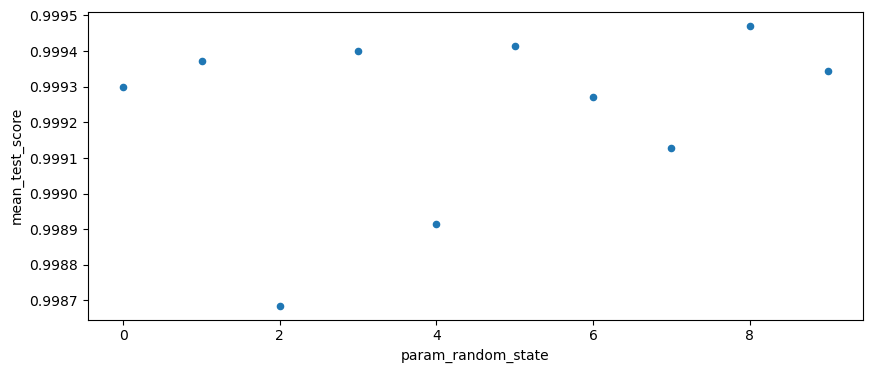

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 4))
pd.DataFrame(grid.cv_results_).plot.scatter(x='param_random_state', y='mean_test_score', ax=ax)
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression

settings, cv = 10, 5

params = {
    'C': np.linspace(.1, 10.0, settings)
}

grid = GridSearchCV(
    estimator=LogisticRegression(class_weight="balanced"), 
    cv=cv,
    n_jobs=-1,
    param_grid=params,
)

grid.fit(X_subsampled, y_subsampled)

/home/arturo/miniforge3/envs/scikit-learn-course/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/arturo/miniforge3/envs/scikit-learn-course/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': array([ 0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ])})

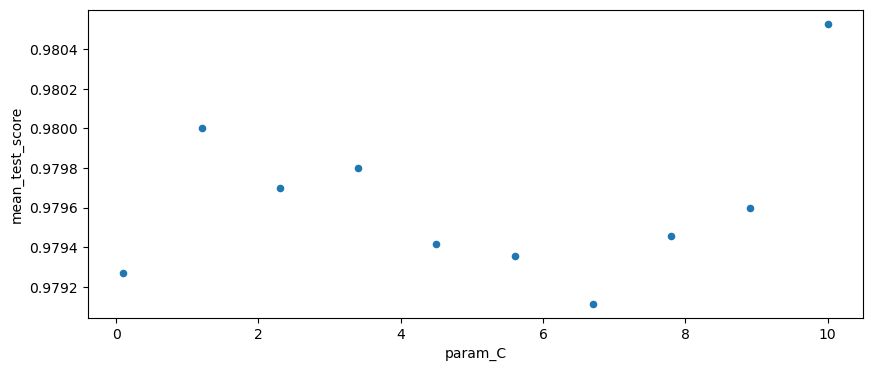

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
pd.DataFrame(grid.cv_results_).plot.scatter(x='param_C', y='mean_test_score', ax=ax)
plt.show()

In [ ]:
n_settings = [1, 3, 5, 10, 30]
max_score = []
cv = 5

for i in n_settings:
    print(i)
    params = {
        'C': np.linspace(.1, 10, i)
    }
    
    grid_base = GridSearchCV(
        estimator=LogisticRegression(class_weight="balanced", max_iter=5),  
        cv=cv,
        n_jobs=-1,
        param_grid=params, 
        scoring={"acc": "accuracy", 'logloss': 'neg_log_loss'},
        refit=False
    )

    grid_iter = GridSearchCV(
        estimator=LogisticRegression(class_weight="balanced", max_iter=500), 
        cv=cv,
        n_jobs=-1,
        param_grid=params, 
        scoring={"acc": "accuracy", 'logloss': 'neg_log_loss'},
        refit=False
    )
    
    max_score.append({
        'i': i,
        'base': grid_base.fit(X_subsampled, y_subsampled).cv_results_['mean_test_acc'].max(),
        'maxiter': grid_iter.fit(X_subsampled, y_subsampled).cv_results_['mean_test_acc'].max(),
    })

1


/home/arturo/miniforge3/envs/scikit-learn-course/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/arturo/miniforge3/envs/scikit-learn-course/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

3


/home/arturo/miniforge3/envs/scikit-learn-course/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/arturo/miniforge3/envs/scikit-learn-course/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

5


/home/arturo/miniforge3/envs/scikit-learn-course/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/arturo/miniforge3/envs/scikit-learn-course/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

10


/home/arturo/miniforge3/envs/scikit-learn-course/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/arturo/miniforge3/envs/scikit-learn-course/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

30


/home/arturo/miniforge3/envs/scikit-learn-course/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/arturo/miniforge3/envs/scikit-learn-course/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

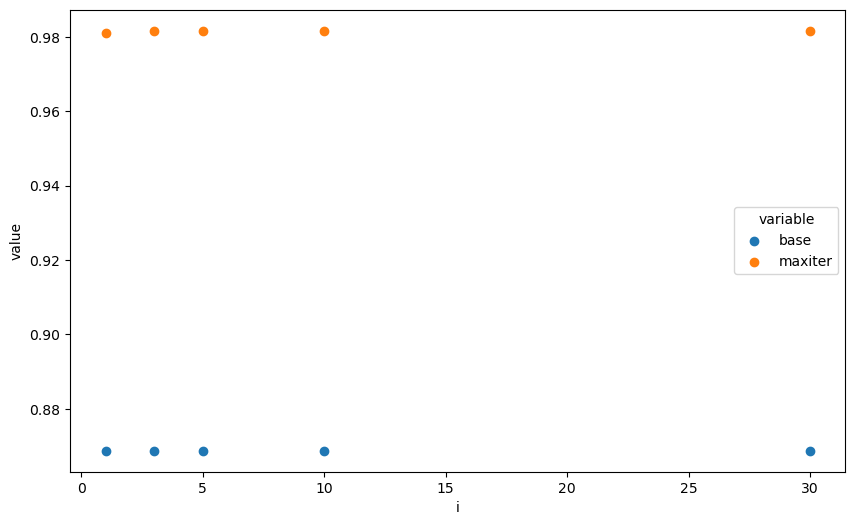

In [8]:
df = pd.DataFrame(max_score)

# Melt to long format (like Polars melt)
df_melted = df.melt(id_vars='i', var_name='variable', value_name='value')

fig, ax = plt.subplots(figsize=(10, 6))
for var, group in df_melted.groupby('variable'):
    ax.scatter(group['i'], group['value'], label=var)

ax.set_xlabel('i')
ax.set_ylabel('value')
ax.legend(title='variable')
plt.show()

In [ ]:
# Alternative plot with polars and altair
import polars as pl
import altair as alt

pl.DataFrame(max_score).unpivot(id_vars=['i']).plot(x='i', y='value', color='variable', kind='scatter')